In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/dharminpolra/Downloads/cities_by_gdp.csv')

In [3]:
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,2,Aachen,Germany,24.296,"249,070"
2,3,Aalborg,Denmark,31.855,"219,487"
3,4,Aarhus,Denmark,54.927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907"


In [4]:
df = df.rename(columns={'Official est. GDP(billion US$)':'gdp_in_usd',
                   'Metropolitian Population':'population',
                  'Country/Region':'country',
                  'Metropolitian Area/City':'city'})

In [5]:
df.dtypes

Index          int64
city          object
country       object
gdp_in_usd    object
population    object
dtype: object

In [6]:
df['gdp_in_usd'] = df['gdp_in_usd'].apply(lambda x:float(x.replace(',','')))
df['population'] = df['population'].apply(lambda x:int(x.replace(',','')))

In [7]:
df.dtypes

Index           int64
city           object
country        object
gdp_in_usd    float64
population      int64
dtype: object

In [8]:
df['CityGDP_per_capita']= df['gdp_in_usd']/df['population']
df.head(20)

,Index,city,country,gdp_in_usd,population,CityGDP_per_capita
0,1,A Coruña metropolitan area,Spain,28.819,1121815,0.000026
1,2,Aachen,Germany,24.296,249070,0.000098
2,3,Aalborg,Denmark,31.855,219487,0.000145
3,4,Aarhus,Denmark,54.927,352751,0.000156
4,5,"Abbotsford, British Columbia",Canada,6.239,203907,0.000031
5,6,"Aberdeen, Scotland",United Kingdom,23.000,489840,0.000047
6,7,Abidjan,Ivory Coast,27.000,5600000,0.000005
7,8,"Abilene, TX MSA",United States,9.469,179308,0.000053
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151.073,1660000,0.000091
9,10,Adelaide,Australia,64.461,1344368,0.000048


In [9]:
df.sort_values(by='CityGDP_per_capita', ascending=False, inplace=True)
df.head(20)

,Index,city,country,gdp_in_usd,population,CityGDP_per_capita
522,523,Metropolitan Cork,Ireland,117.882,270000,0.000437
526,527,"Midland, TX MSA",United States,55.015,177216,0.000310
91,92,Bocholt metropolitan area,Germany,16.488,71074,0.000232
587,588,Offenburg,Germany,20.259,88600,0.000229
702,703,"San Jose-San Francisco–Oakland, CA CSA",United States,1383.000,6518123,0.000212
818,819,Ulm,Germany,26.464,126949,0.000208
452,453,Les Abymes,France,10.807,52118,0.000207
292,293,Greater Dublin Area,Ireland,272.454,1400000,0.000195
367,368,Iserlohn,Germany,16.739,91873,0.000182
534,535,Monaco,Monaco,6.816,39150,0.000174


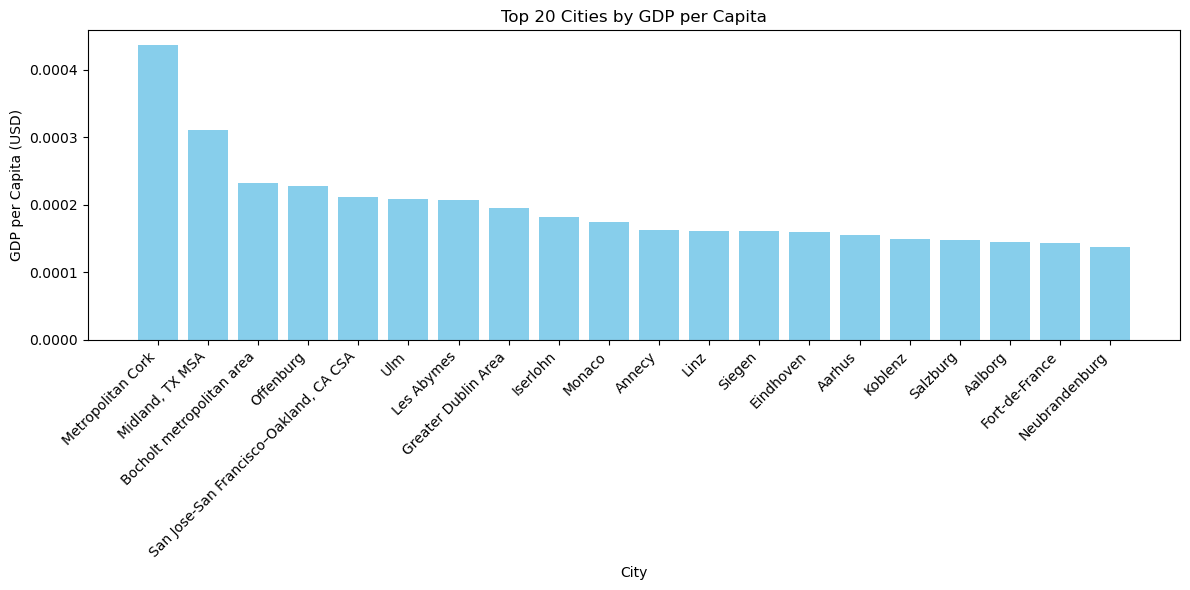

In [10]:
import matplotlib.pyplot as plt

# Sort and select the top 20 cities by 'CityGDP_per_capita'
df.sort_values(by='CityGDP_per_capita', ascending=False, inplace=True)
top_20_cities = df.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_cities['city'], top_20_cities['CityGDP_per_capita'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('GDP per Capita (USD)')
plt.title('Top 20 Cities by GDP per Capita')
plt.tight_layout()
plt.show()
